<a href="https://colab.research.google.com/github/Ethanwood1886/COM5004EWCW1/blob/main/Pimasdataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

KNN Accuracy: 0.7012987012987013
Decision Tree Accuracy: 0.7489177489177489
Confusion Matrix:
 [[119  32]
 [ 37  43]]
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.79      0.78       151
           1       0.57      0.54      0.55        80

    accuracy                           0.70       231
   macro avg       0.67      0.66      0.67       231
weighted avg       0.70      0.70      0.70       231



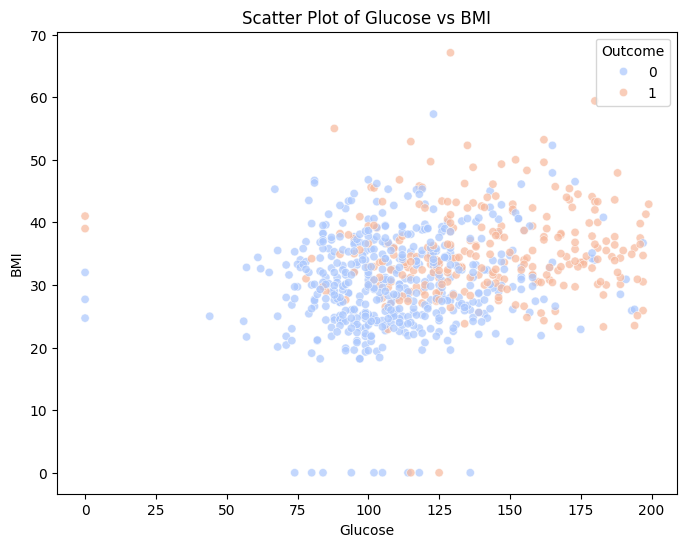

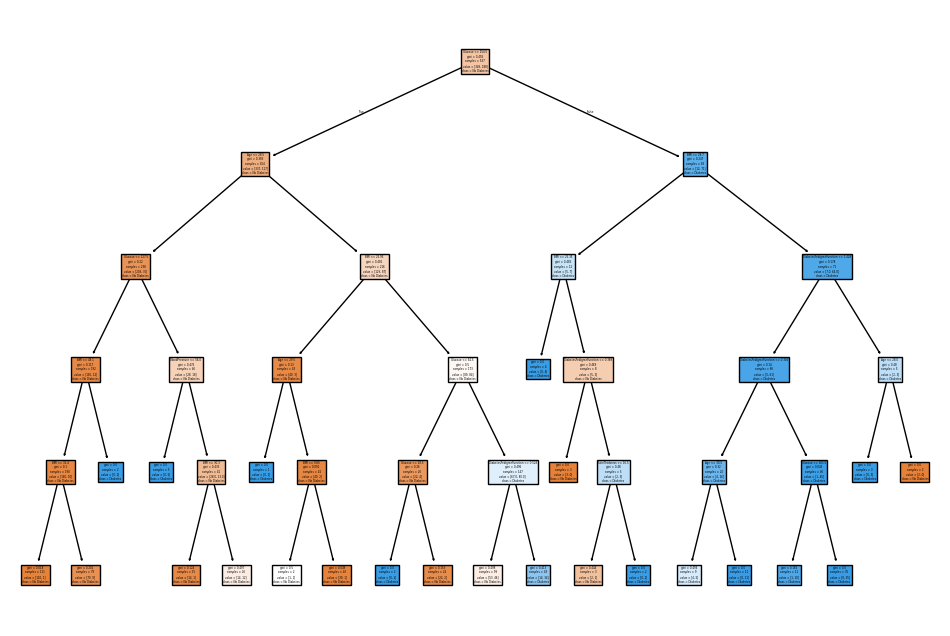

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree


# Load the dataset
df = pd.read_csv('diabetes.csv')

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply KNN
knn = KNeighborsClassifier(n_neighbors=5)  # You can tune the 'n_neighbors' parameter
knn.fit(X_train_scaled, y_train)

# Predictions
y_pred_knn = knn.predict(X_test_scaled)

# Apply Decision Tree
dt = DecisionTreeClassifier(random_state=42, max_depth=5)  # You can tune the 'max_depth' parameter
dt.fit(X_train, y_train)

# Predictions
y_pred_dt = dt.predict(X_test)

# Evaluate
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))

# KNN Visualisation

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Glucose'], y=df['BMI'], hue=df['Outcome'], palette='coolwarm', alpha=0.7)
plt.title('Scatter Plot of Glucose vs BMI')
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.show()

# Decision Tree Visualisation

plt.figure(figsize=(12, 8))
plot_tree(dt, feature_names=df.columns[:-1], class_names=['No Diabetes', 'Diabetes'], filled=True)
plt.show()
